

Material de referência:

* https://github.com/Goktug/8queens-simulated-annealing-python/blob/master/simulated-annealing.py

* http://www.lac.inpe.br/~lorena/cap/Aula_C01.pdf

* https://medium.com/analytics-vidhya/simulated-annealing-869e171e763c

* https://machinelearningmastery.com/simulated-annealing-from-scratch-in-python/

* https://github.com/ivanmpe/recozimento-simulado-n-rainhas/blob/master/simulated_annealing.py

* https://github.com/vitorverasm/ai-nqueens


In [11]:
# Packages
import math
import copy
import random
# from  random import shuffle

# Draw board solution
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
class State:
    def __init__(self, state):
        #state is a list (solution)
        self.state = state
        
    #number of attacks
    def evaluation(self):
        h = 0        
        #check for diagonal attacks
        for i in range(0, len(self.state)):
            for j in range(0, len(self.state)):
                if j > i:
                    if abs(i - j) == abs(self.state[i] - self.state[j]):
                       h += 1
                    if abs(self.state[i] - self.state[j]) == 0:
                       h += 1 
        return h
    
    def getCurrentState(self):
        return self.state
    
    def randon_neighbor(self, current_state): #returns a randon state
        randon_state = current_state.getCurrentState()
        # select a randon movement
        neighbor = random.sample(range(0, len(randon_state) - 1), 2)        
        randon_state[neighbor[0]] = neighbor[1]

        return State(randon_state)

    def best_neighbor(self, current_state): #returns the best neighbor
        # Dictionary with all possible solution for each queen
        neighbors = {}
        state = current_state.getCurrentState()
        for i in range(0, len(state)):
            for j in range(0, len(state)):
                # print("%d %d" % (i,j))
                if j != state[i]:
                    temp = state.copy()
                    temp[i] = j
                    #Generate a new solution list (state)
                    temp = State(temp)                    
                    #Evaluate the number of attacks (heuristic) for each new state
                    neighbors[(i, j)] = temp.evaluation() #list of neighbors' evaluation value
                    #print("%d %d %d" % (i,j,temp.evaluation()))
                    #print(neighbors)
        
        best_neighbors = []
        best_h = current_state.evaluation() #assign current state evaluation to the best evaluation
        
        #Iterate dict itens (i,j)
        # Where i is the key and h the value (number of attacks)
        for i, h in neighbors.items():
            #check if there is a better state than the current state
            if h < best_h: 
                best_h = h
                # best_neighbors.clear()
            if h == best_h:
                best_neighbors.append(i)

        #if there are more than one better solution then choose one of them randomly
        # It is also possible to choose in a greedy way
        if len(best_neighbors) > 0:             
            random_index = random.randint(0, len(best_neighbors) - 1)
            state[best_neighbors[random_index][0]] = best_neighbors[random_index][1]
        else:
          randon_state = current_state.getCurrentState()
          # select a randon choice
          neighbor = random.sample(range(0, len(randon_state) - 1), 2)        
          randon_state[neighbor[0]] = neighbor[1]    

        return State(state) 

In [13]:

#board graphic based on the solution
def board(solution): 
    matrix = np.zeros([8,8], dtype=int)
    matrix = matrix.tolist()
    for item in solution:
        for i in range(len(solution)):
            if i == item:
                for j in range(len(solution)):
                    if  j == solution.index(item):
                        matrix[i][j] = 1
                        
    l =[]
    for i in range(1, len(solution)+1):
        l.append(i)
    
    plt.figure(figsize=(5,5))
    sns.heatmap(matrix, linewidths=.8,cbar=False,cmap='Set3',xticklabels=l,yticklabels=l)


In [27]:
def SA(initial_state, alpha, temp):
    current_state = State(initial_state)
    print("Solução inicial (s): h(s):%d" % current_state.evaluation())
    print(current_state.getCurrentState())

    qtde_iter = 0
    solution = False
    for k in range(0, 100):            
            #Geometric Reduction
            temp *= alpha
            
            #Include a noise for each iteration
            new_solution = current_state.best_neighbor(copy.deepcopy(current_state))
            # print("New Solution: %d" % new_solution.evaluation())
            # print("Current Solution: %d" % current_state.evaluation())

            delta = -(new_solution.evaluation() - current_state.evaluation())
            prob = pow(math.e, delta / temp)
            # prob = math.exp(-delta / temp)
            # print("%f %f %f"%(delta, temp,prob))

            # Evaluate delta signal
            # We can accept the new solution if it has a better 
            # objective function evaluation (the difference is negative) 
            # or if the objective function is worse, but we 
            # probabilistically decide to accept it.
            if delta < 0 or random.uniform(0, 1) < prob:
                # print("%f < %f"%(random.uniform(0, 1), prob))
                current_state = new_solution

            # print(current_state.evaluation())
            #Testa se não existem ataques entre as rainhas, solução encontrada! 
            if current_state.evaluation() == 0 or temp == 0.0001:
                print("Solução ótima encontrada!")
                print("Total: %d iteracoes" % qtde_iter)
                print(current_state.getCurrentState())
                solution = True
                break
            else:
              qtde_iter +=1    

    #caso ao final de todo o Loop principal se encerre sem solução
    if solution == False:
        print("Não foi possivel encontrar a solução ótima!")
        print("Total: %d iteracoes" % qtde_iter)   

    return new_solution

Solução inicial (s): h(s):5
[6, 5, 0, 7, 4, 3, 1, 2]
Solução ótima encontrada!
Total: 31 iteracoes
[3, 5, 7, 2, 0, 6, 4, 1]


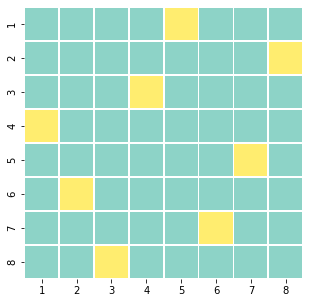

In [30]:
# using random.sample()
# to generate random initial_state
initial_state = random.sample(range(0, 8), 8)
# initial_state = [0, 0, 0, 3, 0, 5, 2, 1]
solution = SA(initial_state, 0.85, 500)
board(solution.getCurrentState())
